# Google Play Store Data Analysis

#### Abstract
With the ever-increasing consumer's appetite for mobile applications, it's now imperative to acquire pivotal insights from the distribution platform which hosts the App. This information helps in understanding user's expectation and market standing. The defination of success of the App differs from developer to developer, for this project we aim to predict the rating of an application.

#### Contents:
1) Import Libraries

2) Data Collection

3) Correlation

4) Data Visualization

5) Data Cleaning

6) Feature Selection

7) Machine Learning Techniques (Logistic Regression and Decision Tree)

### IMPORTING THE LIBRARIES:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

### DATA COLLECTION:
Data collection is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection

In [2]:
#Reading the file

data = pd.read_csv('D:/Sem1/DAV/Group16_Project/googleplaystore.csv')
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


App: Application name <br> 
Category: Category the app belongs to <br>
Rating: Overall user rating of the app (as when scraped)<br>
Reviews: Number of user reviews for the app (as when scraped) <br>
Size: Size of the app (as when scraped) <br>
Installs: Number of user downloads/installs for the app (as when scraped) <br>
Type: Paid or Free Price: Price of the app (as when scraped) <br>
Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult <br>
Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres <br>
Last Updated: Date when the app was last updated on Play Store (as when scraped) <br>
Current Ver: Current version of the app available on Play Store (as when scraped) <br>
Android Ver: Min required Android version

In [3]:
data.shape

(10841, 13)

###  CORRELATION:

In [4]:
#First we group by all the categories and show the mean rating of each category as follows:-
dt_ctg=data.groupby('Category',as_index=False)['Rating'].mean()
dt_ctg.head()

,Category,Rating
0,1.9,19.000000
1,ART_AND_DESIGN,4.358065
2,AUTO_AND_VEHICLES,4.190411
3,BEAUTY,4.278571
4,BOOKS_AND_REFERENCE,4.346067


In [5]:
#First we group by all the reviews and show the mean rating of each reviews as follows:-

dt_rvws=data.groupby('Reviews',as_index=False)['Rating'].mean()
dt_rvws.head(10)

,Reviews,Rating
0,0,NaN
1,1,4.179104
2,10,4.250000
3,100,4.200000
4,1000417,4.300000
5,10006,3.100000
6,100082,4.900000
7,100130,4.300000
8,100179,4.100000
9,1002,4.400000


In [6]:
#First we group by all the size and show the mean rating of each size as follows:-

dt_sz=data.groupby('Size',as_index=False)['Rating'].mean()
dt_sz.head(10)

,Size,Rating
0,"1,000+",19.000000
1,1.0M,3.675000
2,1.1M,4.168000
3,1.2M,4.120000
4,1.3M,3.988889
5,1.4M,4.012000
6,1.5M,4.176316
7,1.6M,4.158065
8,1.7M,4.207143
9,1.8M,4.015385


In [7]:
#First we group by all the Installs and show the mean rating of each install as follows:-

dt_in=data.groupby('Installs',as_index=False)['Rating'].mean()
dt_in.head(6)

,Installs,Rating
0,0,NaN
1,0+,NaN
2,1+,5.000000
3,"1,000+",4.066760
4,"1,000,000+",4.220862
5,"1,000,000,000+",4.258621


In [8]:
#First we group by all the Genres and show the mean rating of each Genre as follows:-

dt_gn=data.groupby('Genres',as_index=False)['Rating'].mean()
dt_gn.head(5)

,Genres,Rating
0,Action,4.285475
1,Action;Action & Adventure,4.311765
2,Adventure,4.180822
3,Adventure;Action & Adventure,4.423077
4,Adventure;Brain Games,4.600000


In [9]:
#First we group by all the type and show the mean rating of each type as follows:-

dt_tp=data.groupby('Type',as_index=False)['Rating'].mean()
dt_tp.head()

,Type,Rating
0,0,19.000000
1,Free,4.186203
2,Paid,4.266615


In [10]:
#First we group by all the price and show the mean rating of each price as follows:-

dt_prc=data.groupby('Price',as_index=False)['Rating'].mean()
dt_prc.head(10)

,Price,Rating
0,$0.99,4.298131
1,$1.00,4.450000
2,$1.04,NaN
3,$1.20,4.200000
4,$1.26,NaN
5,$1.29,4.100000
6,$1.49,4.196774
7,$1.50,4.200000
8,$1.59,4.500000
9,$1.61,4.200000


In [11]:
#First we group by all the Content Rating and show the mean rating of each Content Rating as follows:-

dt_cr=data.groupby('Content Rating',as_index=False)['Rating'].mean()
dt_cr.head(10)

,Content Rating,Rating
0,Adults only 18+,4.300000
1,Everyone,4.186375
2,Everyone 10+,4.257179
3,Mature 17+,4.123427
4,Teen,4.233487
5,Unrated,4.100000


In [12]:
#First we group by all the Android Ver and show the mean rating of each Android Ver as follows:-

dt_av=data.groupby('Android Ver',as_index=False)['Rating'].mean()
dt_av.head()

,Android Ver,Rating
0,1.0 and up,4.050000
1,1.5 and up,4.050000
2,1.6 and up,4.087356
3,2.0 and up,4.370370
4,2.0.1 and up,4.328571


### DATA VISUALIZATION
#### Type

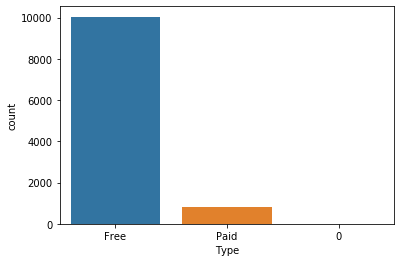

In [13]:
#Visualizing using seaborn countplot on type.
%matplotlib inline
sns.countplot(x='Type',data=data)

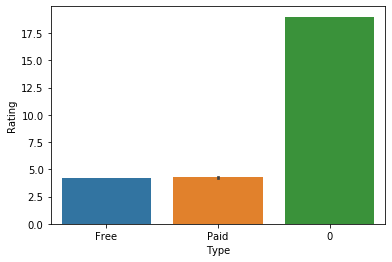

In [14]:
#Visualizing using seaborn barplot on type and rating.

sns.barplot(x='Type', y='Rating', data=data)

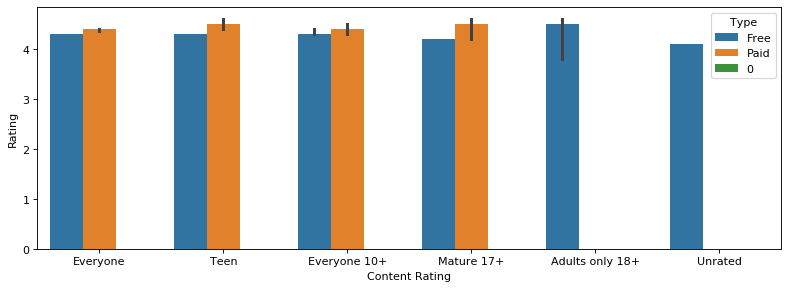

In [15]:
#Visualizing using sns barplot on Content Rating and Rating.

plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='Content Rating', y='Rating', hue="Type", data=data, estimator=np.median)
plt.show()

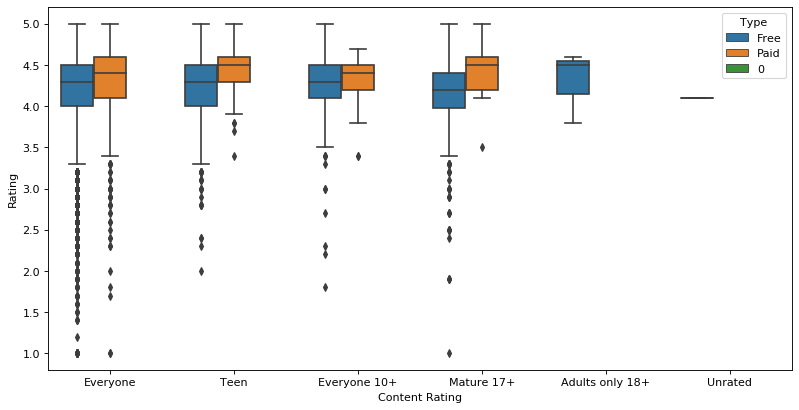

In [16]:
#Visualizing using sns barplot on Content Rating and Rating.

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(x='Content Rating', y='Rating', hue="Type", data=data)
plt.show()

#### Category

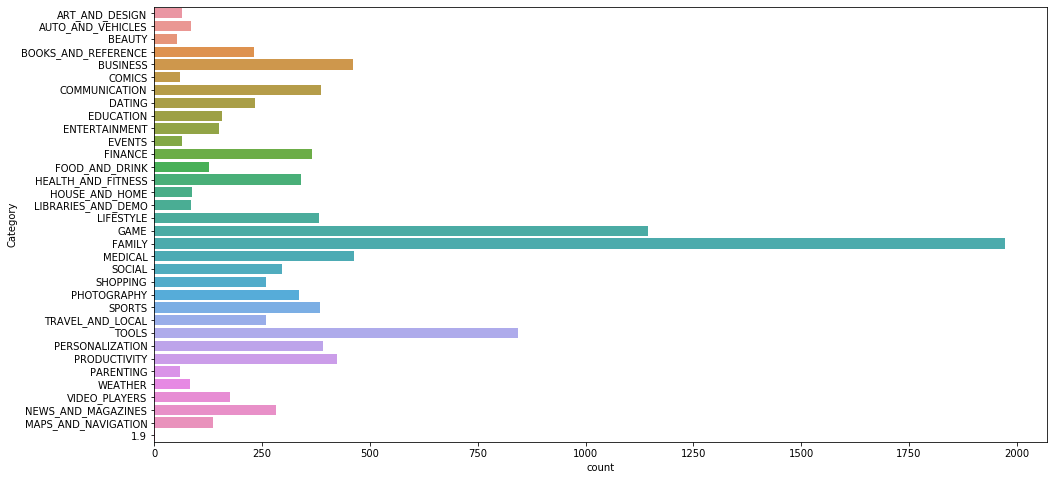

In [17]:
#To visualize category and count using seaborn

plt.figure(figsize=(16,8))
sns.countplot(y='Category',data=data)
plt.show()

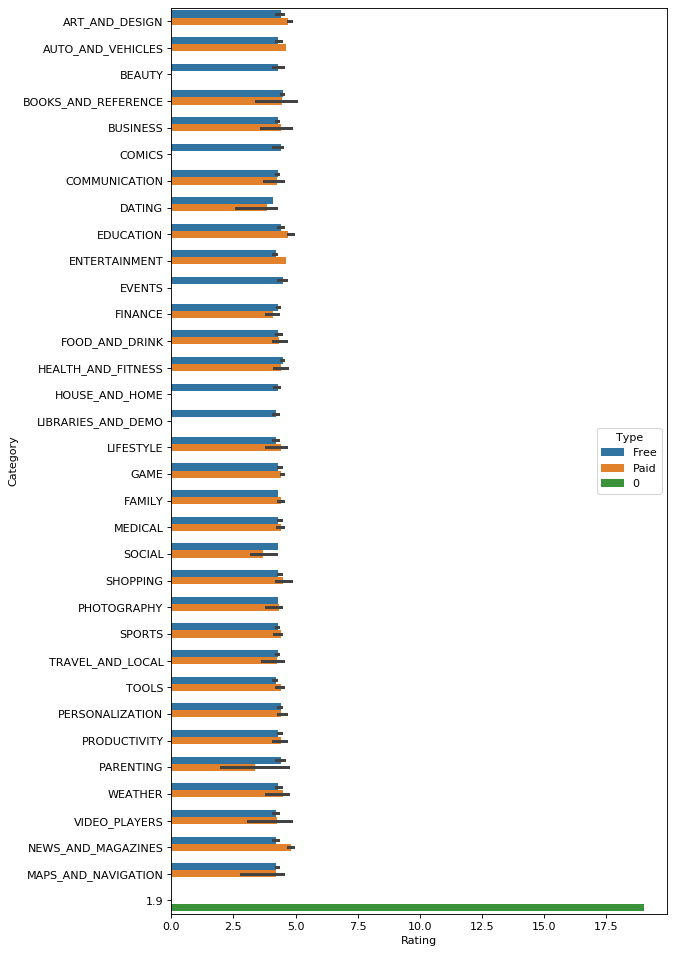

In [18]:
plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(y='Category', x='Rating', hue="Type", data=data, estimator=np.median)
plt.show()

#### Content Rating

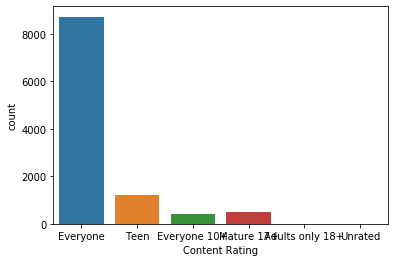

In [19]:
# Countplot on Content Rating using Seaborn
sns.countplot(x='Content Rating',data=data)

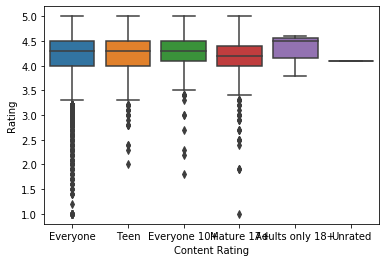

In [20]:
#Boxplot Content Rating vs Rating
sns.boxplot(x='Content Rating', y='Rating', data=data)

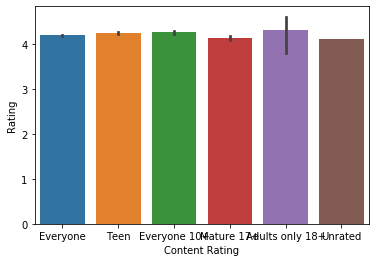

In [21]:
#Barplot Content and Rating using Seaborn
sns.barplot(x='Content Rating', y='Rating', data=data)

#### Installs

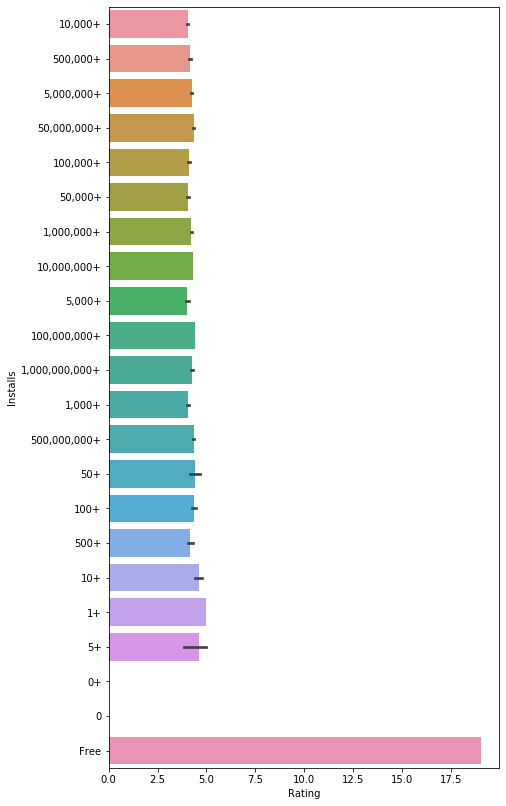

In [22]:
# Barplot on Installs
plt.figure(figsize=(7,14))
sns.barplot(y='Installs', x='Rating', data=data)
plt.show()

#### Android Version

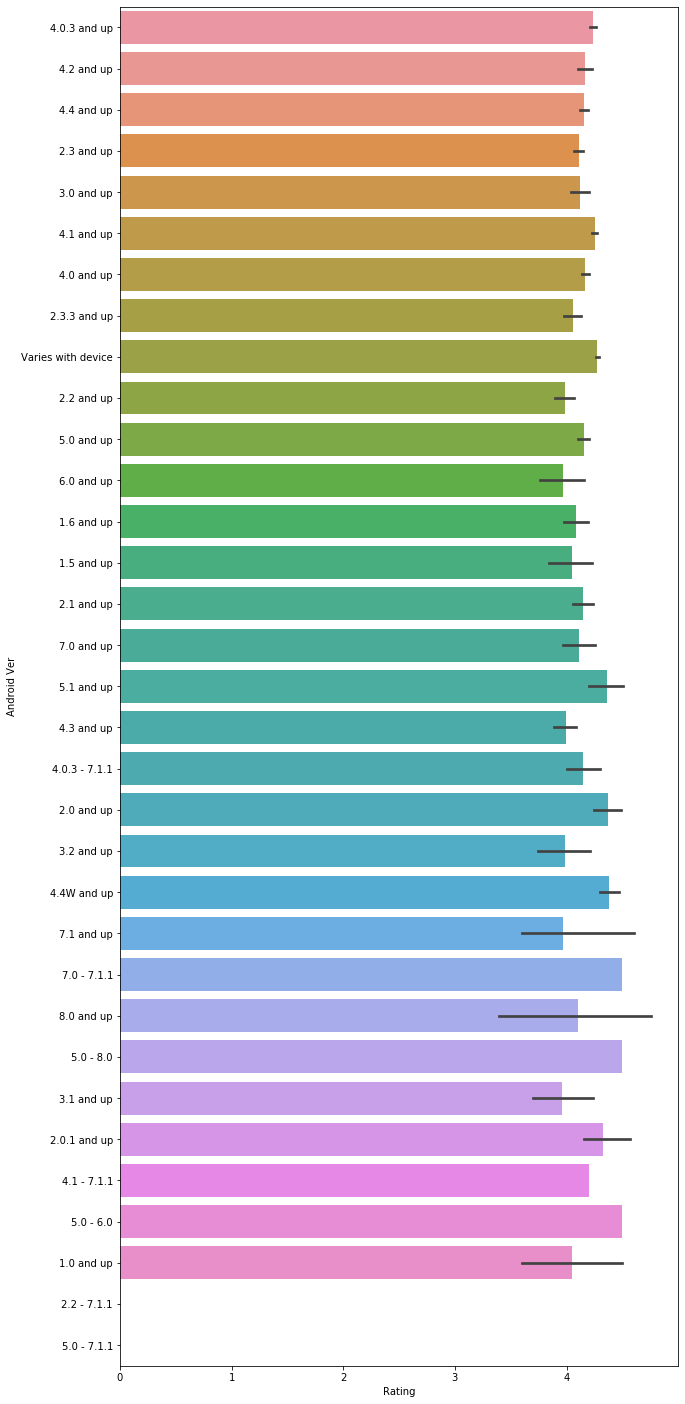

In [23]:
# Barplot on Android Version
plt.figure(figsize=(10, 25))
sns.barplot(y='Android Ver', x='Rating', data=data)
plt.show()

#### Rating

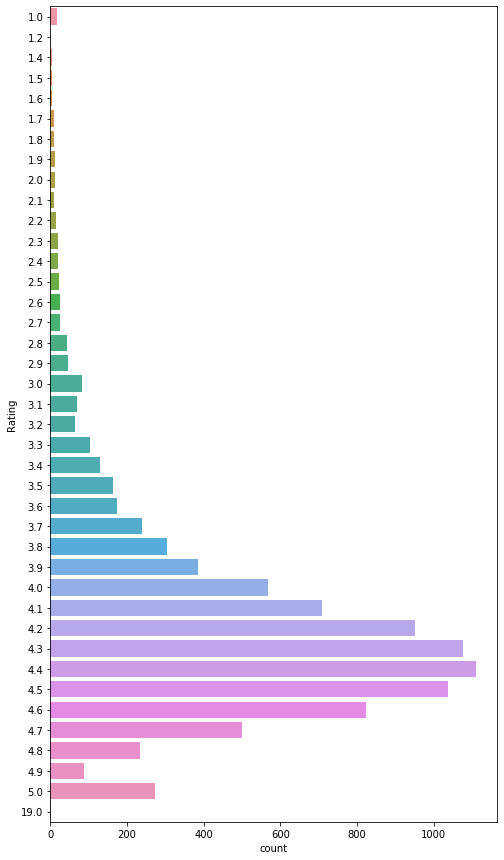

In [24]:
#Countplot on Rating
plt.figure(figsize=(8, 15))
sns.countplot(y='Rating',data=data )
plt.show()

#### Histogram on Rating

<Figure size 432x288 with 0 Axes>

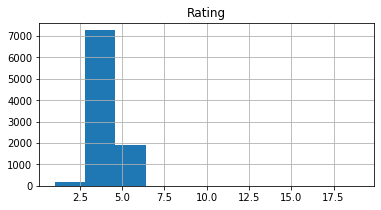

<Figure size 432x288 with 0 Axes>

In [25]:
#Plotting Histogram on Rating
data.hist(figsize=(6,3))
plt.figure()

### DATA CLEANING
In this Datasets we observed that the maximum rating of an app is 19 which is not posible yet,we know that the maximum rating of an app in the google play store is 5

In [26]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We compared with other data and saw that it is wrong

In [27]:
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We shifted the row by 1 to get the actual value of rating

In [28]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We saw that the app Life Made Wi-Fi Touchscreen LPhoto Frame does not have any category.When we searched the app we found that it belonged to lifestyle category.

In [29]:
data.isnull().sum().sum()

1487

In [30]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
Android Ver,2,0.000184
App,0,0.000000
Category,1,0.000092
Content Rating,0,0.000000
Current Ver,8,0.000738
Genres,1,0.000092
Installs,0,0.000000
Last Updated,0,0.000000
Price,0,0.000000
Rating,1474,0.135965


In [31]:
data.dropna(inplace=True)

In [32]:
data.shape

(9360, 13)

At the starting we had 10841 records and 13 fields(columns) and now after all the cleaning we are left with 9360 records and 13 fields ony.

In [33]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [34]:
catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
frames=[data,catgry,typ,cr]
data=pd.concat(frames,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [35]:
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [36]:
data.head(3)

,Rating,Reviews,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,catg_DATING,catg_EDUCATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Feature Selection
Xstant=X-mean(X)/st.dev(X)

Xnorm=X-min(X)/max(X)-min(X)

In [37]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

We divided the dataset into training and testing data in the ratio 80% and 20% respectively

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

### MACHINE LEARNING TECHNIQUES
#### LOGISTIC REGRESSION:
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [40]:
#LogisticRegression : 
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aishwarya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression_accuracy: 0.7670940170940171


#### DECISION TREE
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node.

In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred3=clf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred3)

0.6887464387464387

Decision Tree model gave us approximately 69% accuracy.